### STROKE DISEASE ANALYSIS (DATA LIT VISUALIZATION HOMEWORK ASSIGNEMENT)   

In this notebook, I have analyzed this dataset provided by Kaggle:https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data 

So through this notebook:
     
     . I wanted to see if there is a potential relationship between the average glucose level and the BMI (Body Mass Index =weight/(height^2)) 
     .I built a Decision Tree Classifier to predict if that patient will suffer or not from a stroke (I reached an accuracy of 95%).

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import cufflinks as cf
import plotly.offline as py  
import plotly.graph_objs as go 
import seaborn as sns
cf.go_offline
py.init_notebook_mode
df_train=pd.read_csv("train_2v.csv",sep=",") 
df_test=pd.read_csv("test_2v.csv",sep=",")
df_train.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0

In [2]:
df_clean_train=df_train.dropna()
print(len(df_train))
print(len(df_clean_train))

43400
29072


In [3]:
categorical_labels=["gender","ever_married","work_type","Residence_type","smoking_status"]

for c in categorical_labels: 
    df_clean_train[c+"_id"]=df_clean_train[c].astype("category").cat.codes


In [4]:
df_clean_train.head() 


id  gender   age  hypertension  heart_disease ever_married  \
1  30468    Male  58.0             1              0          Yes   
3  56543  Female  70.0             0              0          Yes   
6  52800  Female  52.0             0              0          Yes   
7  41413  Female  75.0             0              1          Yes   
8  15266  Female  32.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
1        Private          Urban              87.96  39.2     never smoked   
3        Private          Rural              69.04  35.9  formerly smoked   
6        Private          Urban              77.59  17.7  formerly smoked   
7  Self-employed          Rural             243.53  27.0     never smoked   
8        Private          Rural              77.67  32.3           smokes   

   stroke  gender_id  ever_married_id  work_type_id  Residence_type_id  \
1       0          1                1             2                  1   
3       0          0                1             2                  0   
6       0          0                1             2                  1   
7       0          0                1             3                  0   
8       0          0                1             2                  0   

   smoking_status_id  
1                  1  
3                  0  
6                  0  
7                  1  
8                  2

###### Studying potential relationship between "average glucose level" and "bmi"  

In [5]:
cf.offline 
py.init_notebook_mode()
data=go.Data([go.Scatter( 
x=df_clean_train["bmi"], y=df_clean_train["avg_glucose_level"],mode="markers")]) 
layout=go.Layout(title="Relationship between avg_glucose_level and bmi",xaxis=dict(title="bmi"),yaxis=dict(title="avg_glucose_level"))  
figure=go.Figure(data,layout) 
py.iplot(figure)

C:\Users\ink\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




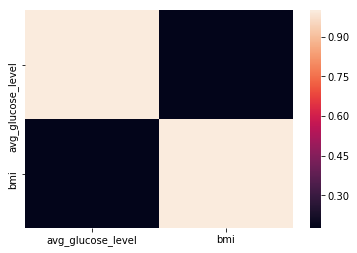

In [7]:
sns.heatmap(df_clean_train[["avg_glucose_level","bmi"]].corr()) 


From the scatter plot and the heat map above, we can conclude that there are no relationship between avaerage glucose level and BMI since the correlation between them is equal to 0.17.


In [17]:
df_stroke=df_clean_train[df_clean_train["stroke"]==1] 
for c in categorical_labels:  
    with_stroke=df_stroke[c].value_counts()
    trace=go.Bar(x=with_stroke.index,y=with_stroke.values,name="With Stroke") 
    data=go.Data([trace]) 
    layout=go.Layout(title=c) 
    figure=go.Figure(data,layout) 
    py.iplot(figure)

C:\Users\ink\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [7]:
df_clean_train.columns
features=['gender_id', 'age', 'hypertension', 'heart_disease', 'ever_married_id',
       'work_type_id', 'Residence_type_id', 'avg_glucose_level', 'bmi',
       'smoking_status_id']
x=df_clean_train[features]
y=df_clean_train["stroke"] 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,stratify=y,random_state=315)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9556800314465409


In [10]:
df_test.isnull().any()
df_cleaning_test=df_test.dropna() 

for c in categorical_labels: 
    df_cleaning_test[c+"_id"]=df_cleaning_test[c].astype("category").cat.codes 
df_cleaning_test.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  36306    Male  80.0             0              0          Yes   
1  61829  Female  74.0             0              1          Yes   
4  40801  Female  63.0             0              0          Yes   
5   9348  Female  66.0             1              0          Yes   
7  60512    Male  46.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban              83.84  21.1  formerly smoked   
1  Self-employed          Rural             179.50  26.0  formerly smoked   
4       Govt_job          Rural              83.57  27.6     never smoked   
5        Private          Urban             219.98  32.2     never smoked   
7       Govt_job          Urban             120.80  32.5     never smoked   

   gender_id  ever_married_id  work_type_id  Residence_type_id  \
0          1                1             2                  1   
1          0                1             3                  0   
4          0                1             0                  0   
5          0                1             2                  1   
7          1                1             0                  1   

   smoking_status_id  
0                  0  
1                  0  
4                  1  
5                  1  
7                  1

In [12]:
df_cleaning_test.head(15)
df_cleaning_test=clf.predict(df_cleaning_test[features]) 
